# Initial EDA

In [1]:
# Importing packages
import pandas as pd
import datetime

## Creating new columns
### Adding day-of-the-week column

In [2]:
# Loading data
df = pd.read_csv('initial_data.csv')

# Converting Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Creating day of the week column
df['day_of_week'] = df['Date'].dt.day_name()

### Adding weekend Boolean column

In [3]:
# Define the function to find weekend values
def weekend(dow):
    if dow == 'Saturday' or dow == 'Sunday':
        return True
    else:
        return False
    
# Apply the function to the Age column using the apply() function
df['weekend'] = df['day_of_week'].apply(weekend)

### Adding season column

In [4]:
# Defining function to identify season
def get_season(date):
    month = date.month
    day = date.day
    if month in [3, 4, 5]:
        season = 'spring'
    elif month in [6, 7, 8]:
        season = 'summer'
    elif month in [9, 10, 11]:
        season = 'fall'
    else:
        season = 'winter'
    

    if month == 3 and day < 20:
        season = 'winter'
    elif month == 6 and day < 21:
        season = 'spring'
    elif month == 9 and day < 22:
        season = 'summer'
    elif month == 12 and day < 21:
        season = 'fall'
    
    return season

# Applying function and creating season column
df['season'] = df['Date'].apply(get_season)

### Adding holiday season column

In [5]:
# Define function to find some major holiday values 
def is_holiday_season(date):
    holidays = [
        datetime.date(date.year, 1, 1),   # New Year's Day
        datetime.date(date.year, 7, 4),   # Independence Day
        datetime.date(date.year, 12, 25), # Christmas Day
        datetime.date(date.year, 11, 4) + datetime.timedelta(weeks=3, days=3),  # Thanksgiving Day: 4th Thursday of November
        datetime.date(date.year, 5, 31) - datetime.timedelta(days=(datetime.date(date.year, 5, 31).weekday() + 1) % 7),  # Memorial Day: last Monday of May
        datetime.date(date.year, 9, 1) + datetime.timedelta(days=7-datetime.date(date.year, 9, 1).weekday()),  # Labor Day: first Monday of September
        datetime.date(date.year, 11, 11),  # Veteran's Day
        datetime.date(date.year, 1, 15) + datetime.timedelta(days=1-datetime.date(date.year, 1, 15).weekday())  # MLK Day: third Monday of January
    ]
    
    # Adding a three day buffer area around each holiday to create a "holiday season"
    for holiday in holidays:
        if (date.date() - datetime.timedelta(days=3)) <= holiday <= (date.date() + datetime.timedelta(days=3)):
            return True
    
    return False

# Create holiday season column
df['holiday_season'] = df['Date'].apply(is_holiday_season)

### Vaccine Announcement Column

In [6]:
# Define a list of unique announcement dates
announcement_dates = [
    "04/28/2023", "04/27/2023", "04/18/2023", "03/14/2023", "03/10/2023",
    "12/16/2022", "12/08/2022", "10/21/2022", "10/12/2022", "09/13/2022",
    "08/31/2022", "08/26/2022", "08/19/2022", "07/13/2022", "07/08/2022",
    "06/30/2022", "06/17/2022", "05/17/2022", "05/05/2022", "04/29/2022",
    "04/15/2022", "04/01/2022", "03/29/2022", "03/21/2022", "03/11/2022",
    "02/11/2022", "02/01/2022", "01/31/2022", "01/11/2022", "01/07/2022",
    "01/03/2022", "12/17/2021", "12/14/2021", "12/09/2021", "11/30/2021",
    "11/19/2021", "10/29/2021", "10/26/2021", "10/22/2021", "10/20/2021",
    "10/14/2021", "10/01/2021", "09/24/2021", "09/22/2021", "09/20/2021",
    "09/17/2021", "09/10/2021", "09/02/2021", "09/01/2021", "08/24/2021",
    "08/23/2021", "08/18/2021", "08/13/2021", "08/12/2021", "08/06/2021",
    "08/03/2021", "07/30/2021", "07/16/2021", "07/13/2021", "07/08/2021",
    "07/06/2021", "07/02/2021", "06/29/2021", "06/25/2021", "06/15/2021",
    "06/11/2021", "06/10/2021", "05/25/2021", "05/19/2021", "05/11/2021",
    "05/10/2021", "04/27/2021", "04/23/2021", "04/21/2021", "04/16/2021",
    "04/13/2021", "04/12/2021", "04/01/2021", "03/26/2021", "03/24/2021",
    "03/17/2021", "03/05/2021", "03/02/2021", "02/27/2021", "02/26/2021",
    "02/25/2021", "02/23/2021", "02/22/2021", "02/12/2021", "02/05/2021",
    "02/04/2021", "01/29/2021", "01/14/2021", "01/04/2021", "12/28/2020",
    "12/22/2020", "12/21/2020", "12/18/2020", "12/17/2020", "12/14/2020", "12/12/2020"
]

# Convert to datetime and deduplicate
announcement_dates = list(set([pd.to_datetime(date) for date in announcement_dates]))


# Check if the date in the dataset is within a week of any announcement dates
def near_announcement(date):
    for announcement in announcement_dates:
        if announcement <= date <= (announcement + pd.Timedelta(days=7)):
            return True
    return False

# Create the 'vax_announcement' column
df['vax_announcement'] = df['Date'].apply(near_announcement)


## Exploring Timetrends in Data

In [43]:
df.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax

In [32]:
pred_var = 'Booster_Doses_Vax_Pct'

In [33]:
data_subset = df[['Booster_Doses_Vax_Pct', 'Date']]

In [34]:
filtered_df = data_subset[data_subset[pred_var].notna()]

min_value = filtered_df['Date'].min()

In [35]:
min_value

Timestamp('2021-12-15 00:00:00')

In [36]:
data_subset[data_subset['Date'] == min_value]

,Booster_Doses_Vax_Pct,Date
23690,36.4,2021-12-15
23691,31.6,2021-12-15
23692,36.7,2021-12-15
23693,33.6,2021-12-15
23694,29.7,2021-12-15
...,...,...
23788,34.6,2021-12-15
23789,34.8,2021-12-15
23790,32.0,2021-12-15
23791,33.2,2021-12-15


<AxesSubplot:title={'center':' Predictive variable over Years'}, xlabel='Date'>

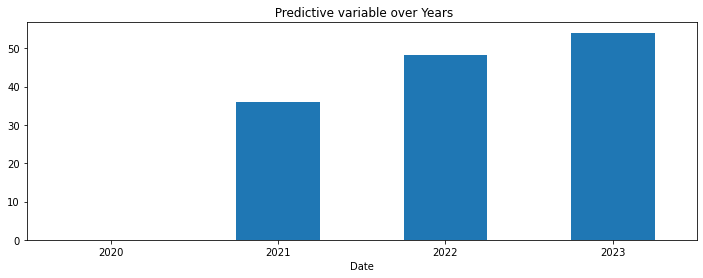

In [39]:
fig, axs = plt.subplots(figsize=(12, 4))
data_subset.groupby(data_subset["Date"].dt.year)[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Years"
)


<AxesSubplot:title={'center':' Predictive variable over Months'}, xlabel='Date'>

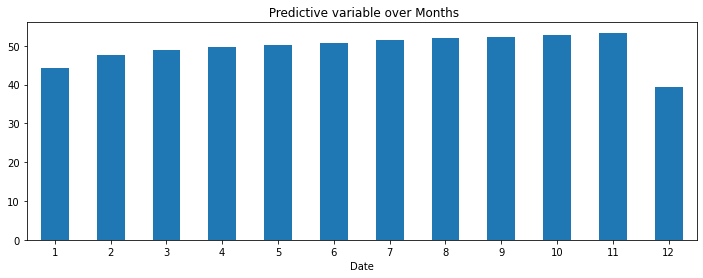

In [40]:
fig, axs = plt.subplots(figsize=(12, 4))
data_subset.groupby(data_subset["Date"].dt.month)[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Months"
)

<AxesSubplot:title={'center':' Predictive variable over Days'}, xlabel='Date'>

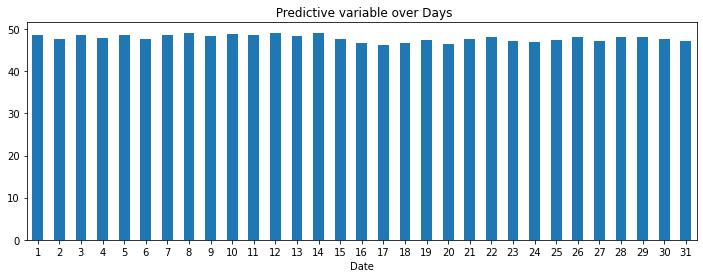

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))
data_subset.groupby(data_subset["Date"].dt.day)[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Days"
)

<AxesSubplot:title={'center':' Predictive variable over Days'}, xlabel='day_of_week'>

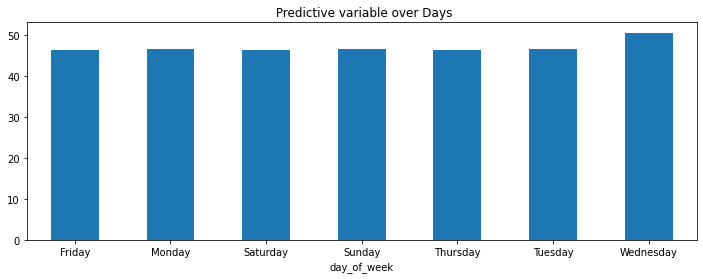

In [47]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["day_of_week"])[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Days of the week"
)

<AxesSubplot:title={'center':' Predictive variable over seasons'}, xlabel='season'>

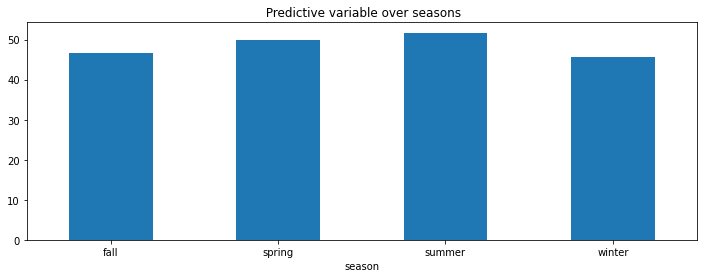

In [48]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["season"])[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over seasons"
)

<AxesSubplot:title={'center':' Predictive variable over dataset time period'}, xlabel='Date'>

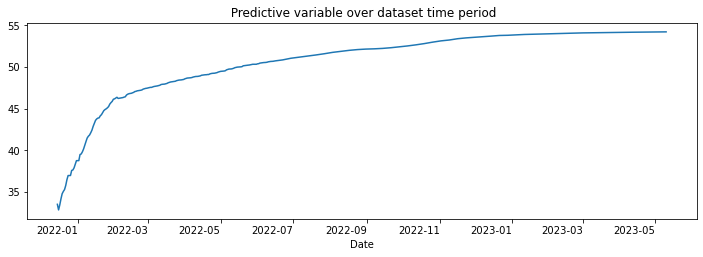

In [51]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["Date"])[pred_var].mean().plot(
    kind='line', rot=0, ax=axs, title = " Predictive variable over dataset time period"
)

In [54]:
df.describe()

,MMWR_week,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
count,61592.000000,61592.000000,6.159200e+04,61452.000000,2.451400e+04,24374.000000,6.159200e+04,61452.000000,6.159200e+04,61452.000000,...,6.099600e+04,21522.000000,2.678000e+03,2652.000000,2.678000e+03,2652.000000,2.678000e+03,2652.000000,2678.000000,2652.000000
mean,23.504124,92.289417,7.043617e+04,44.358306,9.314704e+04,61.420391,6.851830e+04,50.670447,6.403062e+04,53.027931,...,9.660731e+04,20031.686275,2.265258e+04,13.008597,2.208355e+04,14.104676,2.127234e+04,15.189555,9167.902913,36.796041
std,15.461343,22.739325,3.429423e+05,20.188306,4.186017e+05,12.645298,3.310655e+05,22.716994,3.072733e+05,23.146154,...,4.076141e+05,78415.579989,1.080772e+05,3.962543,1.048934e+05,4.222162,1.006132e+05,4.456517,36709.782277,9.278828
min,1.000000,0.000000,0.000000e+00,0.000000,1.463000e+03,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,3.152000e+03,925.000000,2.280000e+02,4.700000,2.270000e+02,5.000000,2.230000e+02,5.300000,155.000000,13.100000
25%,10.000000,97.700000,4.282000e+03,34.600000,7.397000e+03,55.100000,4.268000e+03,40.000000,4.190750e+03,42.900000,...,1.057000e+04,2813.000000,1.364750e+03,10.200000,1.361250e+03,11.100000,1.350250e+03,12.000000,880.250000,30.300000
50%,20.000000,97.800000,9.622000e+03,48.600000,1.577400e+04,61.100000,9.501000e+03,56.000000,9.158000e+03,58.900000,...,1.985950e+04,5359.000000,3.077500e+03,12.700000,3.044500e+03,13.700000,2.983000e+03,14.800000,1921.000000,36.400000
75%,36.000000,98.200000,2.713025e+04,58.100000,3.420350e+04,68.000000,2.698300e+04,66.000000,2.586025e+04,68.700000,...,4.156400e+04,10426.000000,7.638000e+03,15.600000,7.586500e+03,16.900000,7.474000e+03,18.100000,4438.500000,43.225000
max,53.000000,100.000000,4.335968e+06,92.900000,4.282079e+06,99.900000,4.035644e+06,95.000000,3.719660e+06,96.400000,...,4.036995e+06,776229.000000,1.178490e+06,26.500000,1.140416e+06,28.300000,1.092077e+06,29.800000,388252.000000,60.700000


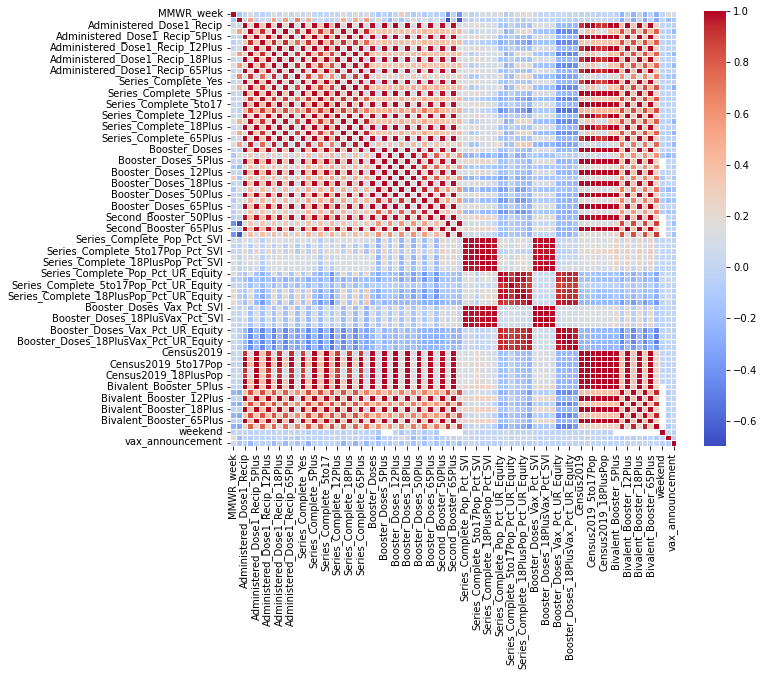

In [58]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

In [61]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation scores for the predictive variable 'TargetVariable'
correlation_scores = correlation_matrix[pred_var].sort_values(ascending=False)


print(correlation_scores)

Booster_Doses_Vax_Pct                      1.000000
Booster_Doses_5Plus_Vax_Pct                0.999678
Booster_Doses_12Plus_Vax_Pct               0.991628
Booster_Doses_18Plus_Vax_Pct               0.987330
Booster_Doses_50Plus_Vax_Pct               0.916613
                                             ...   
Series_Complete_5PlusPop_Pct_SVI          -0.235051
Series_Complete_18PlusPop_Pct_UR_Equity   -0.261207
Series_Complete_12PlusPop_Pct_UR_Equity   -0.274094
Series_Complete_5PlusPop_Pct_UR_Equity    -0.274788
Series_Complete_Pop_Pct_UR_Equity         -0.285546
Name: Booster_Doses_Vax_Pct, Length: 77, dtype: float64
